In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics

### Has the network latency gone up since we switched internet service providers?

Reword: What is our current network latency and how does it compare to the previous latency?

H_0: Changing ISP did not affect latency

H_A: Changining ISP increased latency

True Negative: We do not think latency changed, and it didn't
False Negative: We do not think latency changed, but it did
False Positive: We think latency changed, but it didn't
True Positive: We think latency changed, and it did

### Is the website redesign any good?

Reword: Is customer perception of the new design positive?

H_0: Customer perception is unchanged

H_A: Custome perception has improved

True Negative: We do not think perception changed, and it didn't
False Negative: We do not think perception changed, but it did
False Positive: We think perception changed, but it didn't
True Positive: We think perception changed, and it did

### Is our television ad driving more sales?

Reword: Since the release of the new ad, what has happened to sales?

H_0: Sales have stayed the same-->as relates to the ad

H_A: Sales have increased

True Negative: We do not think sales went up, and they didn't
False Negative: We do not think sales went up, but they did
False Positive: We think sales increased, but they didn't
True Positive: We think sales increased, and they did

## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
## Use a .05 level of significance.

In [2]:
office_1_sample = 40
office_2_sample = 50

office_1_μ = 90
office_1_σ = 15
office_2_μ = 100
office_2_σ = 20
office_1_var = office_1_σ ** .5
office_2_var = office_2_σ ** .5

alpha = .05

#### h_o: the avg sale time for office 1 is = office 2
#### h_a: the avg sale time for office 1 is != office 2


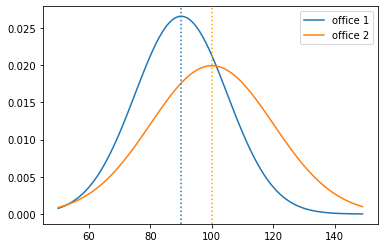

In [7]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [8]:
stats.ttest_ind_from_stats(office_1_μ,office_1_σ,office_1_sample,office_2_μ,office_2_σ, office_2_sample,equal_var=True)
#stats.ttest_1samp and _ind didn't work here b/c of the type of sample

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [9]:
# adjust this according to ravinder's solutions
# print(f'''
# Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')

### The t-test is < 0 and the p-value is less than alpha

### Therefore....we reject the null hypothesis

In [10]:
#this was a two-tailed test (because we were checking for DIFFERENCE rather than greater or lesser)
#Therefore, we don't concern ourselves with T-statistic, only with P, which needs to be less than alpha

# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [11]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [12]:
# HARMONIC MEAN MORE MATHEMATICALLY CORRECT IN THIS SCENARIO
mpg['avg_mpg'] = stats.hmean(mpg[['cty','hwy']], axis = 1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [13]:
mpg_08 = mpg[mpg.year == 2008].avg_mpg
mpg_99 = mpg[mpg.year == 1999].avg_mpg

### 1. Plot the distributions

<AxesSubplot:>

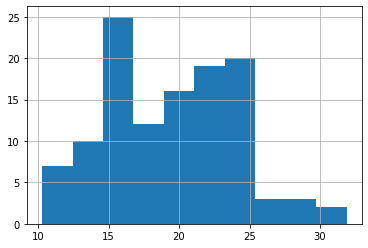

In [14]:
mpg_08.hist()

<AxesSubplot:>

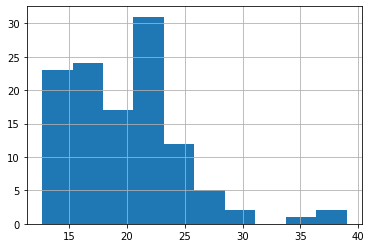

In [15]:
mpg_99.hist()

### 2. Establish hypotheses

- this is two different sub groups, so 2-sample, 2-tailed test (looking for difference, not ">" or "<")

h_o: the mpg for 08 == mpg for 99

h_a: the mpg for 08 != mpg for 99

### 3. Set significance level

In [16]:
α = 0.05

### 4. Verify Assumptions: 
 
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
    - Independent samples  CHECK
    - Equal Variances (or set method argument to False when not)....SEE BELOW

In [17]:
mpg_08.var(), mpg_99.var()

(22.550836772260343, 25.850396545865912)

In [18]:
# stats levene test-- returns p value.  small p means unequal variances
stats.levene(mpg_08, mpg_99)
# high p suggests that the popluations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)



### 5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`



In [19]:
t, p = stats.ttest_ind(mpg_08, mpg_99, equal_var = False)
t, p, α
#in other words, there is an 82% chance that the difference is due to chance

(-0.3011962975077886, 0.7635358418225436, 0.05)

### 6. Decide. 

In [20]:
#p is > than α in this case....
#so, FAIL TO REJECT NULL HYPOTHESIS

In [21]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.''')


Because p (0.764) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.


In [22]:
mpg_08.mean(), mpg_99.mean()

(19.488662986569054, 19.68238764869729)

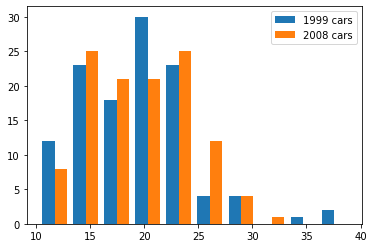

In [23]:
plt.hist([mpg_99, mpg_08], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

# Are compact cars more fuel-efficient than the average car?

- 1 sample vs 2 sample? --> this is 1 sample (the other half of the equation is the population mean)
- 1 tailed vs 2 tailed? --> 1 tailed b/c we are looking for > or <

In [24]:
mpg.rename(columns={'class':'car_class'},inplace = True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [25]:
mpg_compact = mpg[mpg.car_class == 'compact'].avg_mpg
mpg_all = mpg.avg_mpg

### 1. plot

<AxesSubplot:>

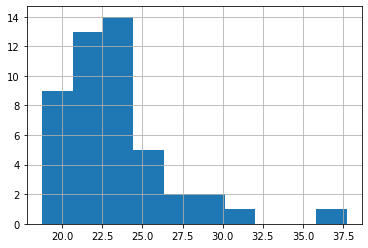

In [26]:
mpg_compact.hist()

<AxesSubplot:>

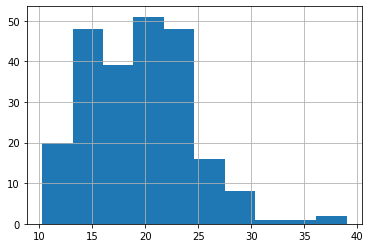

In [27]:
mpg_all.hist()

### 2. hypotheses

h_o: compact mpg <= all mpg

h_a: compact mpg > all mpg

### 3. significance level

In [28]:
α = 0.05

### 4. Verify Assumptions: 
 
    - Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
    - Equal Variances (or set method argument to False when not)....SEE BELOW

In [29]:
mpg_compact.var(), mpg_all.var()

(12.763933193960233, 24.106173930122633)

### 5. Compute test statistic and probability (t-statistic & p-value) using `stats.ttest_ind`



In [30]:
# i ran the test as one sample--1 subgroup, compact,  vs the whole meann
t, p = stats.ttest_1samp(mpg_compact, mpg_all.mean())
t, p / 2, α

(7.512360093161354, 7.808833174403864e-10, 0.05)

### 6. Decide

In [31]:
#t > 0 and p < α
#therefore, we reject the null hypothesis

# Do manual cars get better gas mileage than automatic cars?

- 1 sample or two? two
- 1 tail or two? one

In [32]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [33]:
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg

### 1. Plot the distributions

<AxesSubplot:>

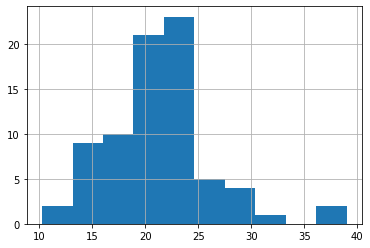

In [34]:
mpg_manual.hist()

<AxesSubplot:>

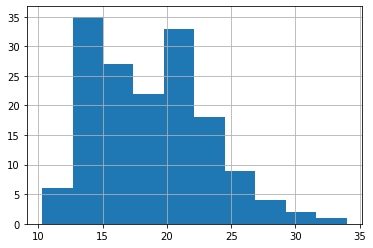

In [35]:
mpg_auto.hist()

### 2. Hypotheses

h_o: manual cars get the same or less mileage as automatics

h_a: manual cars get better mileage than automatics

### 3. Significance

In [36]:
α = 0.05

### 4. Verify Assumptions

- Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)  CHECK
- Independent samples  CHECK
- Equal Variances (or set method argument to False when not)....SEE BELOW

In [37]:
mpg_manual.var(), mpg_auto.var()

(25.665633639828275, 20.428279095002054)

### 5. T-stat and p-value

In [38]:
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var = False)
t, p / 2, α
# don't forget to divide the p by 2, since this is a 1 tailed test!

(4.47444321386703, 7.99035135103976e-06, 0.05)

In [39]:
stats.levene(mpg_manual, mpg_auto)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

### 6. Decide

In [40]:
#t > 0 and p < α
#therefore, we reject the null hypothesis

In [41]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis''')


Because p/2 (0.000008) < alpha (.05), we reject the null hypothesis


In [42]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

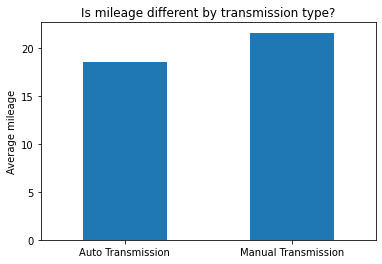

In [43]:
mpg.groupby('transmission_type').avg_mpg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# CORRELATION EXERCISES

## 1. Use the telco_churn data.

In [44]:
# read the .csv into pandas DF
telco = pd.read_csv('telco_churn.csv')
telco = pd.DataFrame(telco)
# drop null values to assist future calculations
telco = telco.dropna()
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Does tenure correlate with monthly charges? 

In [46]:
# assign corresponding columns as x and y variables for ease of use
tenure = telco.tenure
monthly_charges = telco.MonthlyCharges


#apply pearson test to get the correlation and p-value
corr, p = stats.pearsonr(tenure, monthly_charges)
corr, p

(0.24686176664089346, 3.9898213232673846e-98)

### Total charges? 

In [47]:
# same idea as above
total_charges = telco.TotalCharges


corr, p = stats.pearsonr(tenure, total_charges)
corr, p
#notice the miniscule p value, rounded to zero

(0.825880460933202, 0.0)

### What happens if you control for phone and internet service?

In [48]:
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2391,7318-EIVKO,Male,0,No,No,8,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.25,436.60,No
557,1154-HYWWO,Male,0,No,No,38,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Mailed check,70.60,2708.20,No
6763,7471-MQPOS,Male,1,Yes,Yes,71,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),72.90,5139.65,No
6882,8065-QBYTO,Female,1,No,No,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,One year,Yes,Credit card (automatic),99.65,7181.25,No
5075,4879-GZLFH,Female,0,Yes,Yes,42,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.40,No


In [49]:
# assign the 'hasphone' tenure group according to the values in the PhoneService column
tenure_hasphone = telco[telco.PhoneService == "Yes"].tenure
monthly_charges_hasphone = telco[telco.PhoneService == "Yes"].MonthlyCharges
# remember your basics of returning only monthly charges on the rows with "Yes" for PhoneService

tenure_hasphone, monthly_charges_hasphone
#just checking length and dtype here:

(1       34
 2        2
 4        2
 5        8
 6       22
         ..
 7037    72
 7038    24
 7039    72
 7041     4
 7042    66
 Name: tenure, Length: 6352, dtype: int64,
 1        56.95
 2        53.85
 4        70.70
 5        99.65
 6        89.10
          ...  
 7037     21.15
 7038     84.80
 7039    103.20
 7041     74.40
 7042    105.65
 Name: MonthlyCharges, Length: 6352, dtype: float64)

#### THIS WOULD BE THE CORRELATION FOR TENURE AND MONTHLY CHARGES FOR THOSE WHO HAVE PHONE SVC

In [50]:
# and, we're ready to calculate
corr, p = stats.pearsonr(tenure_hasphone, monthly_charges_hasphone)
corr, p

(0.2441939657519323, 6.82801603762022e-87)

#### AND FOR NO PHONE SERVICE:

In [51]:
tenure_NOphone = telco[telco.PhoneService == "No"].tenure
monthly_charges_NOphone = telco[telco.PhoneService == "No"].MonthlyCharges

corr, p = stats.pearsonr(tenure_NOphone, monthly_charges_NOphone)
corr, p

(0.5924298640568983, 1.1732739032891168e-65)

#### For customers with DSL

In [52]:
tenure_DSL = telco[telco.InternetService == "DSL"].tenure
monthly_charges_DSL = telco[telco.InternetService == "DSL"].MonthlyCharges

corr, p = stats.pearsonr(tenure_DSL, monthly_charges_DSL)
corr, p

(0.5197012004433113, 2.889518579135088e-167)

#### For Customers with Fiber optic

In [53]:
tenure_fiber = telco[telco.InternetService == "Fiber optic"].tenure
monthly_charges_fiber = telco[telco.InternetService == "Fiber optic"].MonthlyCharges

corr, p = stats.pearsonr(tenure_fiber, monthly_charges_fiber)
corr, p

(0.6246206176175583, 0.0)

#### For customer with no Internet Service

In [54]:
tenure_NOinternet = telco[telco.InternetService == "No"].tenure
monthly_charges_NOinternet = telco[telco.InternetService == "No"].MonthlyCharges

corr, p = stats.pearsonr(tenure_NOinternet, monthly_charges_NOinternet)
corr, p

(0.34618773548574655, 4.896604599951957e-44)

## IN THE ABOVE EXERCISE, IT WOULD BE NICE TO USE A FOR LOOP TO CREATE
## MULTIPLE SIMULATIONS AT A TIME

## 2. Use the employees database.

In [55]:
from get_db_url import get_db_url
#imported my get database url function

In [56]:
sql = """
    SELECT * from salaries s
"""
#write some sql to get the data i need

In [57]:
url = get_db_url('employees')
salaries_df = pd.read_sql(sql,url)
salaries_df.head()
#read the sql into python

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [58]:
sql = """
    SELECT * from employees.employees e
    """

# inspired by PJ:
# select *, datediff(to_date,now()) as tenure
# join etc etc etc
# or to the effect...

In [59]:
url = get_db_url('employees')
employees_df = pd.read_sql(sql,url)
employees_df.head()


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


### Is there a relationship between how long an employee has been with the company and their salary?

In [61]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 13.7+ MB


In [62]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


In [63]:
employees_df['hire_date'] = pd.to_datetime(employees_df['hire_date'], dayfirst=True)
employees_df.head()

# notice the PANDAS function above...not a Dataframe function, but rather a pandas function

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [64]:
employees_df['tenure'] = pd.Timestamp.now().normalize() - employees_df['hire_date']


employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,13135 days
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,12855 days
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,12760 days
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,11744 days


In [65]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   emp_no      300024 non-null  int64          
 1   birth_date  300024 non-null  object         
 2   first_name  300024 non-null  object         
 3   last_name   300024 non-null  object         
 4   gender      300024 non-null  object         
 5   hire_date   300024 non-null  datetime64[ns] 
 6   tenure      300024 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(4), timedelta64[ns](1)
memory usage: 16.0+ MB


In [66]:
employees_df.tenure.astype(int)

0         1116115200000000000
1         1134864000000000000
2         1110672000000000000
3         1102464000000000000
4         1014681600000000000
                 ...         
300019     909446400000000000
300020     981849600000000000
300021    1121817600000000000
300022     885772800000000000
300023     755395200000000000
Name: tenure, Length: 300024, dtype: int64

In [67]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   emp_no      300024 non-null  int64          
 1   birth_date  300024 non-null  object         
 2   first_name  300024 non-null  object         
 3   last_name   300024 non-null  object         
 4   gender      300024 non-null  object         
 5   hire_date   300024 non-null  datetime64[ns] 
 6   tenure      300024 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(4), timedelta64[ns](1)
memory usage: 16.0+ MB


In [68]:
# try using a groupby for the DFs 
# the salaries table has many duplicates 
# get the max (assuming the highest salary is the current)

salaries_df.groupby('emp_no').salary.agg(['max'])
salaries_df.sample(10)

,emp_no,salary,from_date,to_date
1940282,404540,51905,1999-06-04,2000-06-03
2811956,496557,59261,2001-05-25,2002-05-25
1410804,248601,40000,1993-04-24,1994-04-24
404322,52586,47934,1989-05-20,1990-05-20
2139825,425614,53032,1998-01-20,1999-01-20
2730720,487988,43117,1993-05-19,1994-05-19
1767842,286307,46098,1989-11-27,1990-11-27
1763556,285846,51654,1999-10-07,2000-10-06
2160352,427792,65507,1998-07-22,1999-07-22
2782469,493451,62417,2001-05-23,2002-05-23


In [69]:
salaries_df.groupby('emp_no').salary.agg(['max']).shape

(300024, 1)

In [70]:
employees_df.shape

(300024, 7)

In [71]:
merged_df = employees_df.merge(salaries_df, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
merged_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66961,1990-06-25,1991-06-25
...,...,...,...,...,...,...,...,...,...,...
2844042,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8743 days,63707,1997-11-30,1998-11-30
2844043,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8743 days,67043,1998-11-30,1999-11-30
2844044,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8743 days,70745,1999-11-30,2000-11-29
2844045,499999,1958-05-01,Sachin,Tsukuda,M,1997-11-30,8743 days,74327,2000-11-29,2001-11-29


In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2844047 entries, 0 to 2844046
Data columns (total 10 columns):
 #   Column      Dtype          
---  ------      -----          
 0   emp_no      int64          
 1   birth_date  object         
 2   first_name  object         
 3   last_name   object         
 4   gender      object         
 5   hire_date   datetime64[ns] 
 6   tenure      timedelta64[ns]
 7   salary      int64          
 8   from_date   object         
 9   to_date     object         
dtypes: datetime64[ns](1), int64(2), object(6), timedelta64[ns](1)
memory usage: 238.7+ MB


In [80]:
merged_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
merged_df.head()

#this cell is dropping duplicates and keeping only the first instance of the salaries, which is the highest

,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,12918 days,66961,1990-06-25,1991-06-25


In [81]:
tenure = merged_df.tenure.astype(int)
salary = merged_df.salary

corr, p = stats.pearsonr(tenure, salary)
corr, p

(0.1576291970698629, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [88]:
sql = """
    SELECT * from titles t
"""

In [89]:
url = get_db_url('employees')
titles_df = pd.read_sql(sql,url)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [90]:
titles_df.shape

(443308, 4)

In [91]:
titles_df.groupby('emp_no').title.count()
# this is the right number.  i need to adjust above on tenure and salary (ditch the duplicates)

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [92]:
titles_df.sample()

,emp_no,title,from_date,to_date
90902,71385,Staff,1987-03-31,1993-03-30


In [94]:
titles = titles_df.groupby('emp_no').title.count()

tenure = employees_df.tenure.astype(int)

#apply pearson test to get the correlation and p-value
corr, p = stats.pearsonr(tenure, titles)
corr, p

(0.26659892991366185, 0.0)

# Use the sleepstudy data. Is there a relationship between days and reaction time?

In [102]:
import seaborn as sns
sleepstudy = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [103]:
sleepstudy['Subject'] = 'subject_' + sleepstudy['Subject'].astype(str)

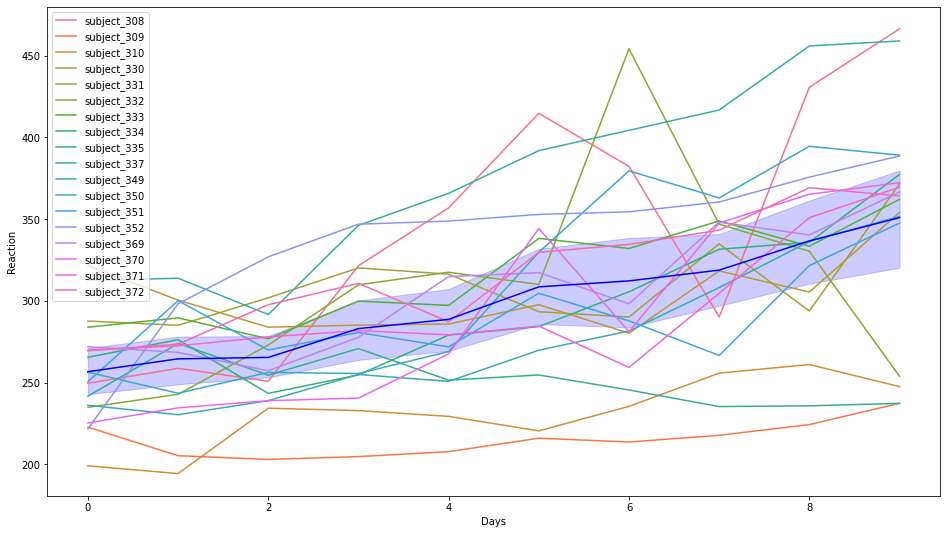

In [104]:
plt.figure(figsize = (16,9))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject') #, color = 'RdBu_r')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'b')
sns.color_palette("crest", as_cmap=True)
#don't forget the way to put two plots on one graph : ))

In [117]:
sleepstudy.sample()

,Reaction,Days,Subject
37,280.2396,6,subject_330


In [118]:
reaction = sleepstudy.Reaction
days = sleepstudy.Days


<AxesSubplot:>

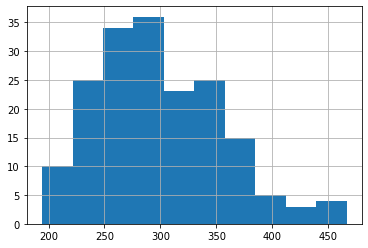

In [119]:
reaction.hist()

<AxesSubplot:>

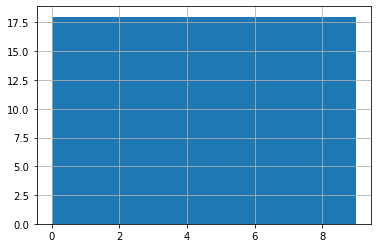

In [120]:
days.hist()

In [121]:

corr, p = stats.pearsonr(days, reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)